In [4]:
!pip install natsort

In [7]:
!pip install tensorflow

  Using cached wrapt-1.12.1.tar.gz (27 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=d23746b7837ae6884f24289a3379122596aba56f4a66a42e0334bdec346ad1a1
  Stored in directory: c:\users\oleg\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-win_amd64.whl size=33722 sha256=73f9eb58a16ec807006b20f0f78728fc1b130949da8247ae0bafee546c5872d0
  Stored in directory: c:\users\oleg\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2


In [16]:
!pip install opencv-python

In [1]:
# IMPORT appropriate libraries
import numpy as np
import pandas as pd
import os 
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import cv2

In [2]:
# Importing Images on apple trees
DIR = r'D:\Python Projects\Plant Pathology\images'

In [3]:
#Importing csv-files with lables
train = pd.read_csv(r'D:\Python Projects\Plant Pathology\train.csv')
test = pd.read_csv(r'D:\Python Projects\Plant Pathology\test.csv')

In [4]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [5]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


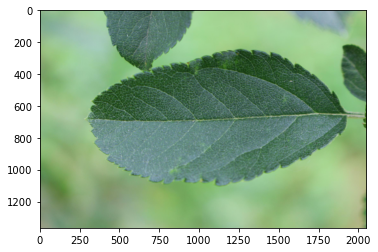

In [6]:
image = Image.open(r'D:\Python Projects\Plant Pathology\images\Original Dataset (все в куче)\Test_3.jpg')
plt.imshow(image)
plt.show()

## Preparing training data

In [7]:
# Получим столбцы с диагнозом листьев. Колонка с Id картинки нам не нужна.
class_names = train.loc[:, 'healthy':].columns
class_names

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')

In [8]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [9]:
""" Создадим новую колонку 'label' для того чтобы 
в нее поместить все заболевания деревьев, то есть 0 - healthy, 
                                                  1 - multiple_deseases, 
                                                  2 - rust, 
                                                  3 - scab  
"""
number = 0
train['label'] = 0
# train.head()
for name in class_names:
    train['label'] = train['label'] + train[name] * number
    number += 1
train.head()   

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [10]:
#Посмотрим парвильно ли были посчитаны значния в колонке lable
train.label.value_counts()

2    622
3    592
0    516
1     91
Name: label, dtype: int64

In [11]:
def get_label_image(image):
    if search('Train', image):
        image = image.split('.')[0]
        label = train.loc[train['image_id'] == image]['label']
        return label
    
# Проверка 
get_label_image('Train_0.jpg')

0    3
Name: label, dtype: int64

In [12]:
#os.listdir(DIR) #Неотсортированный список картинок 
#natsort.natsorted(os.listdir(DIR)) #Отсортированный список картинок по номеру

In [13]:
# img.split('_')[1].split('.')[0] выделяет номер из названия картинки т.е. Train_21.jpg -> 21

In [47]:
# Создадим папки для различных заболеваний деревьев в тренировчной выборке, а так же папку для тестовой выборки
shutil.os.mkdir(r'D:\Python Projects\Plant Pathology\images\train')
shutil.os.mkdir(r'D:\Python Projects\Plant Pathology\images\train\Healthy')
shutil.os.mkdir(r'D:\Python Projects\Plant Pathology\images\train\Multiple_deseases')
shutil.os.mkdir(r'D:\Python Projects\Plant Pathology\images\train\Rust')
shutil.os.mkdir(r'D:\Python Projects\Plant Pathology\images\train\Scab')
shutil.os.mkdir(r'D:\Python Projects\Plant Pathology\images\test') 

In [14]:
def create_train_data():
    images = natsort.natsorted(os.listdir(DIR)) # Сортирует названия картинок 
    for img in tqdm(images):
        label = get_label_image(img)
        path = os.path.join(DIR, img) # Добавляет к основному пути, где лежат все картинки имя определенной картинки
        
        if search('Train', img):
            if (img.split('_')[1].split('.')[0]) and label.item() == 0:
                shutil.copy(path, r'D:\Python Projects\Plant Pathology\images\train\Healthy') 
                # Копирует картинку с путем path в папку Healthy
                
            elif (img.split('_')[1].split('.')[0]) and label.item() == 1:
                shutil.copy(path, r'D:\Python Projects\Plant Pathology\images\train\Multiple_deseases') 
                # Копирует картинку с путем path в папку Multiple_deseases
                
            elif (img.split('_')[1].split('.')[0]) and label.item() == 2:
                shutil.copy(path, r'D:\Python Projects\Plant Pathology\images\train\Rust') 
                # Копирует картинку с путем path в папку Rust
                
            elif (img.split('_')[1].split('.')[0]) and label.item() == 3:
                shutil.copy(path, r'D:\Python Projects\Plant Pathology\images\train\Scab') 
                # Копирует картинку с путем path в папку Scab
        elif search('Test', img):
            shutil.copy(path, r'D:\Python Projects\Plant Pathology\images\test')
            # Копирует картинку с путем path в папку Test
                

In [49]:
# Распределим картинки с заболеваниями в тренировочном наборе по соответствующим папкам
move_to_correct_folder = create_train_data()

100%|█████████████████████████████████████████████████████████████████████████████| 3644/3644 [00:34<00:00, 104.82it/s]


После того как мы добавили колонку label и распределили наши картинки по папкам в зависимости от заболевания, можем переходить к построению модели

## Data Preprocessing

В самом начеле у картинок очень большой размер 2048х1365 нужно его уменьшить 

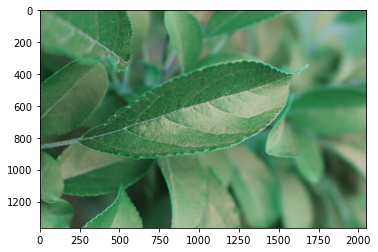

In [15]:
Train_DIR = r'D:\Python Projects\Plant Pathology\images\train'
category_deseases = ['Healthy', 'Multiple_deseases', 'Rust', 'Scab']

for category in category_deseases:
    path = os.path.join(Train_DIR, category) # Путь к папкам с отсортированными по заболеваниям картинками
    for image in os.listdir(path): # Просматриваются все картинки в папках с заболеваниями 
        original_image = cv2.imread(os.path.join(path, image), cv2.COLOR_BGR2RGB) # Считывание картинки 
        plt.imshow(original_image)
        plt.show()
        break
    break

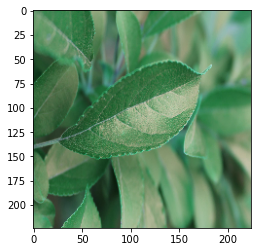

In [16]:
# Resize picture 
IMAGE_SIZE = 224 
resizing_image = cv2.resize(original_image,(IMAGE_SIZE, IMAGE_SIZE))
#Изменение размера картинки на 224х224, размер выбирается таким образом чтобы пикселей практически небыло видно
plt.imshow(resizing_image)
plt.show()

## Model preparation 

Подключаем необходимые модули из библиотеки Tensorflow

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [18]:
# Проверим может ли Tensorflow работать на видеокарте (GPU)
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [21]:
# Создадим генератор вариантов одного и того же изображения. Например, изменим zoom, повернем по часовой стрелке и т.д.
data_generator = ImageDataGenerator(rescale=1./255,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          vertical_flip=True,
                                          horizontal_flip=True,
                                          validation_split=0.2) #20% от тренировочной выборки - валидационные данные

train_data_generator = data_generator.flow_from_directory(r'D:\Python Projects\Plant Pathology\images\train',
                                                         target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                         batch_size=16,
                                                         class_mode='categorical',
                                                         subset='training')
                                                      
validation_data_generator = data_generator.flow_from_directory(r'D:\Python Projects\Plant Pathology\images\train',
                                                              target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                              batch_size=16,
                                                              class_mode='categorical',
                                                              subset='validation')                                               

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


In [25]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), padding='same')) #Input layer
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) # First hidden layer  
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) # Second hidden layer 
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same')) # Third hidden layer
model.add(MaxPooling2D(2, 2))

model.add(Flatten()) # Делаем так, чтобы все данные стали одномерным массивом, т.е. строкой 

model.add(Dense(4, activation='softmax')) # Output layer, цифра 4 потому что у нас четыре категории болезней!!!

# Настройка процесса обучения
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary() # Инофрмация по нейронной сети

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

In [26]:
checkpoint=ModelCheckpoint(r'D:\Python Projects\Plant Pathology\Models\apple2.h5', # Сохранение данных с переодичностью
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop=EarlyStopping(monitor='val_loss', #Модель остановится считать, если точность перестанет значительно изменяться
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True) 

callbacks=[checkpoint, earlystop] #Набор параметров для обратного вызова

Запуск модели на обучение

In [27]:
model_history = model.fit_generator(train_data_generator, 
                                   validation_data= validation_data_generator,
                                   epochs=30,
                                   steps_per_epoch=train_data_generator.samples//16,
                                   validation_steps=validation_data_generator.samples//16,
                                   callbacks=callbacks)

D:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
91/91 [==============================] - 123s 1s/step - loss: 1.2882 - accuracy: 0.3233 - val_loss: 1.2577 - val_accuracy: 0.3239

Epoch 00001: val_loss improved from inf to 1.25768, saving model to D:\Python Projects\Plant Pathology\Models\apple2.h5
Epoch 2/30
91/91 [==============================] - 99s 1s/step - loss: 1.2463 - accuracy: 0.3579 - val_loss: 1.2470 - val_accuracy: 0.3466

Epoch 00002: val_loss improved from 1.25768 to 1.24698, saving model to D:\Python Projects\Plant Pathology\Models\apple2.h5
Epoch 3/30
91/91 [==============================] - 98s 1s/step - loss: 1.2627 - accuracy: 0.3291 - val_loss: 1.2529 - val_accuracy: 0.3239

Epoch 00003: val_loss did not improve from 1.24698
Epoch 4/30
91/91 [==============================] - 98s 1s/step - loss: 1.2671 - accuracy: 0.3050 - val_loss: 1.2368 - val_accuracy: 0.3665

Epoch 00004: val_loss improved from 1.24698 to 1.23685, saving model to D:\Python Projects\Plant Pathology\Models\apple2.h5
Epoch 5/30
91/91

**При первом запуске получили val_loss = 1.20940, но точность была = 0, поэтому это не правльный расчет, нужно переделывать**


Построение графиков точности на тренировочном и валидационных наборах 

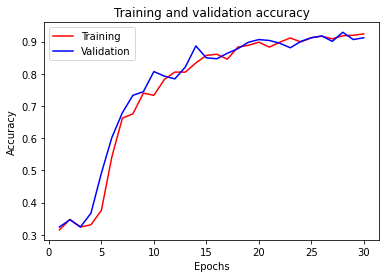

In [35]:
train_accuracy = model_history.history['accuracy']
validation_accuracy = model_history.history['val_accuracy']
epochs = range(1, 31)
plt.plot(epochs, train_accuracy, 'r', label='Training')
plt.plot(epochs, validation_accuracy, 'b', label='Validation')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Построение графиков потерь на тренировочном и валидационных наборах 

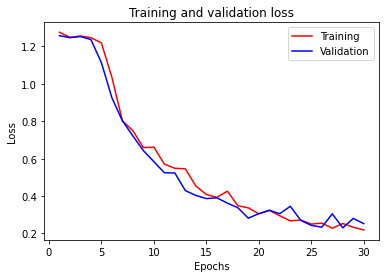

In [34]:
train_loss = model_history.history['loss']
validation_loss = model_history.history['val_loss']
epochs = range(1, 31)
plt.plot(epochs, train_loss, 'r', label='Training')
plt.plot(epochs, validation_loss, 'b', label='Validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Сделаем предсказание на одной картинке 

In [93]:
from tensorflow.keras.preprocessing import image

In [94]:
test_image = r'D:\Python Projects\Plant Pathology\images\test\Test_11.jpg'

In [95]:
image_for_graphics = Image.open(test_image)
test_image = image.load_img(test_image, target_size=(224, 224)) #Загружаем картинку 
test_image_array = image.img_to_array(test_image) #Переводим картинку в массив чисел

In [96]:
test_image_array_scaled = test_image_array/255 #Переведем значение каждого пикселя в дипазон от 0 до 1
test_image_array_scaled = np.expand_dims(test_image_array_scaled, axis=0) # Добавим новую ось 

In [97]:
test_image_array_scaled.shape

(1, 224, 224, 3)

In [98]:
category_deseases = ['Healthy', 'Multiple_deseases', 'Rust', 'Scab']
result = model.predict(test_image_array_scaled)
print(result)

[[0.9678314  0.00613945 0.00938431 0.0166448 ]]


In [99]:
category_deseases[np.argmax(result)] 

'Healthy'

Поэтому можно утверждать, что наша модель с вероятностью 96% уверена, что на фото находится здоровое дерево 


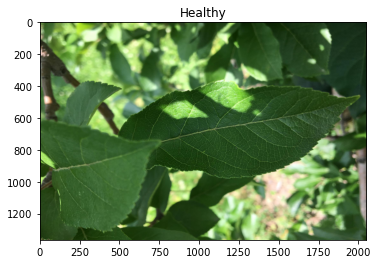

In [100]:
# Сделаем теперь так, чтобы над исходной картинкой появлялась надпись с результатом предсказания
image_for_graphics = plt.imshow(image_for_graphics)
plt.title(category_deseases[np.argmax(result)])
plt.show()